<a href="https://colab.research.google.com/github/kavinda-athu/ImageProcessingAssignment3/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

190060P Athukorala K.H

In [92]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


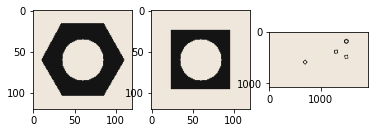

In [93]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('/content/gdrive/My Drive/ColabNotebooks/assignment3/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('/content/gdrive/My Drive/ColabNotebooks/assignment3/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('/content/gdrive/My Drive/ColabNotebooks/assignment3/conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image.

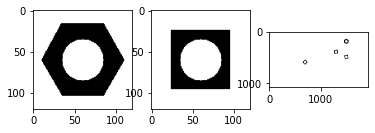

In [94]:
hexnut_gray = cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_gray = cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_gray = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

#blur1 = cv.GaussianBlur(hexnut_gray,(5,5),0)
#blur2= cv.GaussianBlur(squarenut_gray,(5,5),0)
#blur3 = cv.GaussianBlur(conveyor_gray,(5,5),0)

ret1,th1 = cv.threshold(hexnut_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3)
ax[0].imshow(th1,'gray')
ax[1].imshow(th2,'gray')
ax[2].imshow(th3,'gray')
plt.show()



Apply morphological closing to remove small holes inside the foreground.

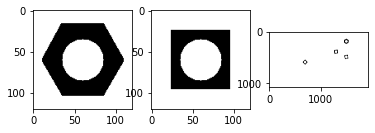

In [95]:
kernel = np.ones((3,3),np.uint8)
closing1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closing2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3)
ax[0].imshow(closing1,'gray')
ax[1].imshow(closing2,'gray')
ax[2].imshow(closing3,'gray')
plt.show()


Connected components analysis:
Stats is a matrix of the stats that the function calculates. It has a length  equal to the number of labels and a width equal to the number of stats.There are five stats in here. They are,





1. cv2.CC_STAT_LEFT The leftmost (x) coordinate which is the inclusive start of 
the bounding box in the horizontal direction.
2. cv2.CC_STAT_TOP The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
3. cv2.CC_STAT_WIDTH The horizontal size of the bounding box.
4. cv2.CC_STAT_HEIGHT The vertical size of the bounding box.
5. cv2.CC_STAT_AREA The total area (in pixels) of the connected component.



There are 3 connected components in hexnut template.
Statistics:
[[  11   16   99   88 4722]
 [   0    0  120  120 7717]
 [  35   35   51   51 1961]]

Centroids:
[[59.83354511 59.22257518]
 [59.168848   59.54269794]
 [60.         60.        ]]


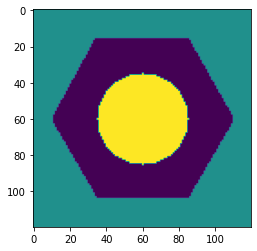

In [96]:
output1 = cv.connectedComponentsWithStats(closing1)
print('There are {} connected components in hexnut template.'.format(output1[0]))
print('Statistics:')
print(output1[2])
print()
print('Centroids:')
print(output1[3])
plt.imshow(output1[1])

There are 3 connected components in hexnut template.
Statistics:
[[  24   24   72   72 3223]
 [   0    0  120  120 9216]
 [  35   35   51   51 1961]]

Centroids:
[[59.19578033 59.19578033]
 [59.5        59.5       ]
 [60.         60.        ]]


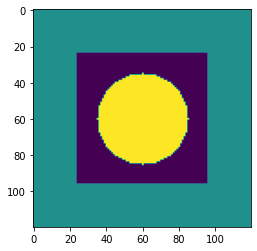

In [97]:
output2 = cv.connectedComponentsWithStats(closing2)
print('There are {} connected components in hexnut template.'.format(output2[0]))
print('Statistics:')
print(output2[2])
print()
print('Centroids:')
print(output2[3])
plt.imshow(output2[1])


There are 6 connected components in hexnut template.
Statistics:
[[    651     151     895     499   13930]
 [      0       0    1920    1080 2051826]
 [   1475     175      51      51    1961]
 [   1275     375      51      51    1961]
 [   1475     475      51      51    1961]
 [    675     575      51      51    1961]]

Centroids:
[[1275.02110553  400.11083991]
 [ 956.24734066  540.88404962]
 [1500.          200.        ]
 [1300.          400.        ]
 [1500.          500.        ]
 [ 700.          600.        ]]


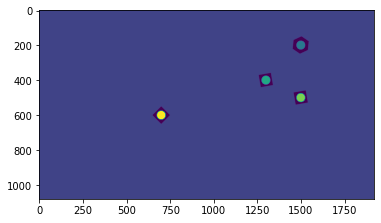

In [98]:
output3 = cv.connectedComponentsWithStats(closing3)
print('There are {} connected components in hexnut template.'.format(output3[0]))
print('Statistics:')
print(output3[2])
print()
print('Centroids:')
print(output3[3])
plt.imshow(output3[1])

Contour analysis: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


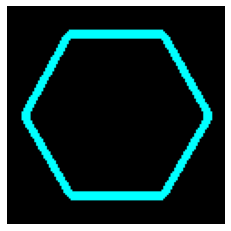

In [99]:
back_ground1=np.zeros(hexnut_template.shape)
contours1, hierarchy1 = cv.findContours(closing1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt1= [contours1[i] for i in range(1,3,2)]
cv.drawContours(back_ground1, cnt1,-1, (0,255,150), 3)
plt.imshow(back_ground1)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


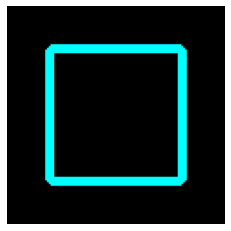

In [100]:
back_ground2=np.zeros(squarenut_template.shape)
contours2, hierarchy2 = cv.findContours(closing2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt2= [contours2[i] for i in range(1,3,2)]
cv.drawContours(back_ground2, cnt2, -1, (0,255,150), 3)
plt.imshow(back_ground2)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


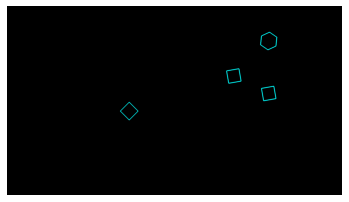

In [101]:
back_ground3=np.zeros(conveyor_f100.shape)
contours3, hierarchy3 = cv.findContours(closing3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt3 = [contours3[i] for i in range(1,9,2)]
cv.drawContours(back_ground3, cnt3, -1, (0,255,150), 3)
plt.imshow(back_ground3)
plt.axis('off')
plt.show()

Counting the number of matching hexagonal nuts in conveyor_f100.png.

In [102]:
total=0
for el in contours3:
  ret = cv.matchShapes(el,contours1[1],1,0.0)
  if (ret < 0.003):
    total += 1

print("Number of hexagonal nuts in conveyor_f100 picture :", total)

Number of hexagonal nuts in conveyor_f100 picture : 1


Counting the number of objects that were conveyed along the conveyor belt.

In [115]:
cap = cv.VideoCapture('/content/gdrive/My Drive/ColabNotebooks/assignment3/conveyor.mp4')
frames=[]
while cap.isOpened():
  ret, frame = cap.read()
  frames.append(frame)
  if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break    
cap.release()
total=0
dic = {'hex':0, 'square':0}
previous_max_distance = 0
for frame in frames[:-1]:
    matched=[]
    h_total=0
    s_total=0
    img_gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    ret,th = cv.threshold(img_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    kernel = np.ones((3,3),np.uint8)
    closing = cv.morphologyEx(th, cv.MORPH_CLOSE, kernel)
    frame_con,frame_hie = cv.findContours(closing,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    stat = cv.connectedComponentsWithStats(closing)
    lis={'hex':[], 'square':[]}
    for con in frame_con:
      M = cv.moments(con)
      count_r = cv.matchShapes(con,contours1[1],1,0.0)
      count_q = cv.matchShapes(con,contours2[1],1,0.0)
      if count_r<=0.004 and abs(cv.contourArea(con)-cv.contourArea(contours1[1]))<=500:
        h_total+=1
        lis['hex'].append(int(M['m10']/M['m00']))
      elif count_q<=0.005 and abs(cv.contourArea(con)-cv.contourArea(contours2[1]))<=500:
        s_total+=1
        lis['square'].append(int(M['m10']/M['m00']))

    f_max = {'hex':0, 'square':0}
    for nut in ['hex','square']:
        for y in lis[nut]:
            f_max[nut] = max(f_max[nut], y)
            if dic[nut] < y:
                total+= 1
        dic[nut] = f_max[nut]
    text1= 'Hexnut count  : '+str(h_total)
    text2='Squrenut count : '+ str(s_total)
    text3= 'Current frame  : '+str(h_total+s_total)
    text4='Total count : '+ str(total)
    cv.putText(img=frame, text= text1, org=(70, 70), fontFace=cv.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(0, 0, 255),thickness=1)
    cv.putText(img=frame, text= text2, org=(70, 150), fontFace=cv.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(0, 0, 255),thickness=1)
    cv.putText(img=frame, text= text3, org=(70, 230), fontFace=cv.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(0, 0, 255),thickness=1)
    cv.putText(img=frame, text= text4, org=(70, 310), fontFace=cv.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(0, 0, 255),thickness=1)




Can't receive frame (stream end?). Exiting.


In [116]:
frame_array = frames[:-1]
shape = (1080, 1920, 3)
out = cv.VideoWriter('/content/gdrive/My Drive/ColabNotebooks/assignment3/conveyor_result_190060P.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
for i in range(len(frame_array)):
  out.write(frame_array[i])
out.release()